# Advanced fMRI data analysis 
## General Linear Model 1


In this assignment, your task is to complete a few linear regression excercises in Python.

You can choose to answer in Polish or English (it will not affect your grade).

**DEADLINE:** 08-05-2020

-------------------

## Linear regression analysis with signals of non-neuronal origin

*Confounds* (or nuisance regressors) are variables representing fluctuations with a potential non-neuronal origin. Such non-neuronal fluctuations may drive spurious results in fMRI data analysis, including standard activation GLM and functional connectivity analyses. Read [more](https://fmriprep.readthedocs.io/en/stable/outputs.html#confounds).

Run simple and multiple linear regression to investigate associations between regressors.

Confounds regressors calculated with *fMRIPrep* are stored in data folder (`/data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv`)

### Task 1

Investigate linear relationship between *global signal* (signal from the whole brain) and signal from *white matter*.

In [ ]:
# Load libraries
import nipype.interfaces.fsl as fsl
import nipype.interfaces.spm as spm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load DataFrame with confounds
confounds_path = "data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv"
confounds = pd.read_csv(confounds_path, delimiter="\t")

# Print all column names (use df.columns.values)
confounds.columns.values


array(['csf', 'csf_derivative1', 'csf_power2', 'csf_derivative1_power2',
       'white_matter', 'white_matter_derivative1',
       'white_matter_derivative1_power2', 'white_matter_power2',
       'global_signal', 'global_signal_derivative1',
       'global_signal_derivative1_power2', 'global_signal_power2',
       'std_dvars', 'dvars', 'framewise_displacement', 't_comp_cor_00',
       't_comp_cor_01', 't_comp_cor_02', 't_comp_cor_03', 't_comp_cor_04',
       't_comp_cor_05', 'a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02',
       'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'a_comp_cor_06',
       'a_comp_cor_07', 'a_comp_cor_08', 'a_comp_cor_09', 'a_comp_cor_10',
       'a_comp_cor_11', 'a_comp_cor_12', 'a_comp_cor_13', 'a_comp_cor_14',
       'a_comp_cor_15', 'a_comp_cor_16', 'a_comp_cor_17', 'a_comp_cor_18',
       'a_comp_cor_19', 'a_comp_cor_20', 'a_comp_cor_21', 'a_comp_cor_22',
       'a_comp_cor_23', 'a_comp_cor_24', 'a_comp_cor_25', 'a_comp_cor_26',
       'a_comp_cor_

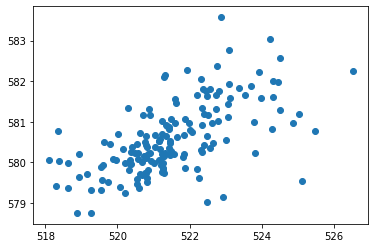

In [3]:
# Select columns representing global signal and white matter signal
b = confounds[["global_signal","white_matter"]]

# Plot association between these signals using on scatterplot
plt.scatter(confounds["global_signal"], confounds["white_matter"])

In [4]:
# Run simple linear regression for global signal and white matter signal
from sklearn.linear_model import LinearRegression
a = confounds["global_signal"].values
c= confounds["white_matter"].values
linear_regression = LinearRegression() 
linear_regression.fit(a.reshape(-1, 1), c.reshape(-1, 1))

# Print intercept and beta values
intercept = linear_regression.intercept_
beta = linear_regression.coef_

print("intercept:", intercept)
print("beta:", beta)

intercept: [398.69831806]
beta: [[0.34877226]]


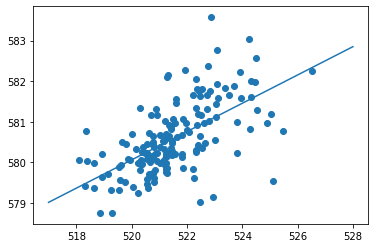

In [5]:
# Make a scatterplot representing association between signals with fitted linear regression line

x = np.linspace(517,528,100)
y = beta*x+intercept
y = np.squeeze(y)

plt.scatter(a,c)
plt.plot(x,y)


### Task 2

*Framewise displacement* variable in confounds table (stored as `framewise_displacement`) is a quantification of the estimated bulk-head motion. Run multiple linear regression to predict `framewise_displacement` from six motion parameters (3 rotations, 3 translations). Use previously loaded confounds table.


In [115]:
# Filter dataframe to store only 6 motion parameters

six_motion = confounds[["trans_x", "trans_y", "trans_z", "rot_x", "rot_y", "rot_z"]].drop(six_motion.index[0])
print(six_motion.shape)
# Print firt 5 rows of motion parameters
print(six_motion.head())

# Filter dataframe to store framewise displacement
frame_disp = confounds[["framewise_displacement"]].drop(frame_disp.index[0])



print(frame_disp)

(159, 6)
    trans_x   trans_y   trans_z     rot_x     rot_y     rot_z
1 -0.000095 -0.017757 -0.097059  0.001619 -0.000964 -0.000202
2 -0.000099  0.000539 -0.050085  0.001288 -0.000964 -0.000246
3 -0.006923  0.023834 -0.036712  0.001190 -0.000884  0.000039
4  0.007688  0.016427  0.015656  0.000609 -0.000964  0.000216
5  0.008326 -0.001197 -0.032286  0.000327 -0.000964  0.000207
     framewise_displacement
1                  0.204795
2                  0.084094
3                  0.066659
4                  0.116312
5                  0.080793
..                      ...
155                0.092260
156                0.158364
157                0.182714
158                0.179263
159                0.101484

[159 rows x 1 columns]


In [120]:
# Fit multiple linear regression model 

regr = LinearRegression()
regr.fit(six_motion, frame_disp)

# Print intercept and beta values
intercept = regr.intercept_
beta = regr.coef_

print("intercept:", intercept)
print("beta:", beta)


intercept: [0.10217716]
beta: [[-0.40116933 -0.15608601 -0.08604222 -3.47703684 -3.29403679  7.3812089 ]]


Which of the 6 motion parameter values has highest corresponding beta value?

**Answer**: Translation Z

--------

## Linear regression on movie/TV series characters profile pictures

### Task 3

In folder `data/characters` you can find pictures of 5 characters from Harry Potter movie stored as 400$\times$400 numpy arrays (RED channel). 

Add your favourite movie/TV character from previous homework to the folder (array has to have the same dimension) and run multiple regression to predict your character from other other characters pictures. 

You can load more pictures to improve your prediction!!!


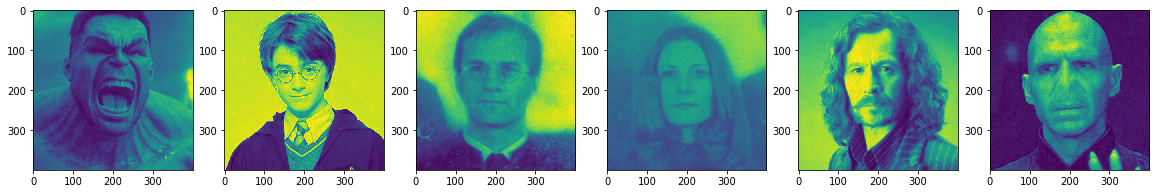

In [123]:
# Load image of your favoutite character
path = "data/characters/hulk-cgi.jpg.npy"
hulk = np.load(path)


# Load pictures of other characters


path0 = "data/characters/harry.npy"
harry = np.load(path0)
path1 = "data/characters/james.npy"
james = np.load(path1)
path2= "data/characters/lilly.npy"
lilly = np.load(path2)
path3 = "data/characters/syrius.npy"
syrius = np.load(path3)
path4= "data/characters/voldemort.npy"
voldemort = np.load(path4)


# Plot all pictures on a one figure (use plt.subplots)

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(20, 20))
ax1.imshow(hulk)
ax2.imshow(harry)
ax3.imshow(james)
ax4.imshow(lilly)
ax5.imshow(syrius)
ax6.imshow(voldemort)

In [156]:
# Make a matrix of characters (remember to change matrices to vectors and transpose).

characters_matrix = []
characters=[hulk, harry,james,lilly,syrius,voldemort]
for char in characters:
    characters_matrix.append(char.flatten())

characters_matrix = np.array(characters_matrix)
characters_matrix = characters_matrix.T
print(characters_matrix.shape)

# Fit multiple linear regression to predict your favourite character from other characters
linear_regression = LinearRegression()
linear_regression.fit(characters_matrix[:,1:], characters_matrix[:,0])


# Print intercept and beta values
beta = linear_regression.coef_
intercept = linear_regression.intercept_
print(beta, intercept)


(6, 160000)
(160000, 6)
[-0.05344227  0.35715588 -0.07303663  0.01579603 -0.14874159] 51.59397132831434


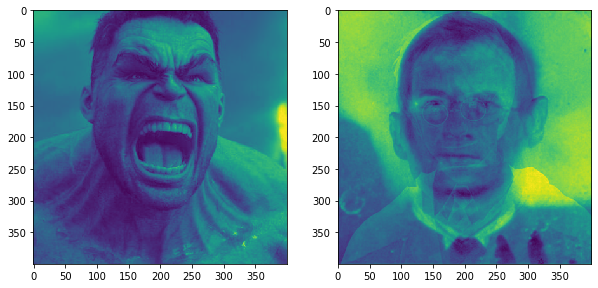

In [155]:
# Calculate your predicted character

predict = beta[0]*harry + beta[1]*james + beta[2]*lilly + beta[3]*syrius + beta[4]*voldemort + intercept
# Plot your original character and predicted character on a one plot (use plt.subplots)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(hulk)
ax2.imshow(predict)

Which of the characters has highest and lowest corresponding beta values?

**Highest**: Harry :D

**Lowest**: Voldemort